In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

df = pd.read_csv('melb_data.csv')
df.shape

(13580, 21)

Text(0, 0.5, 'Count')

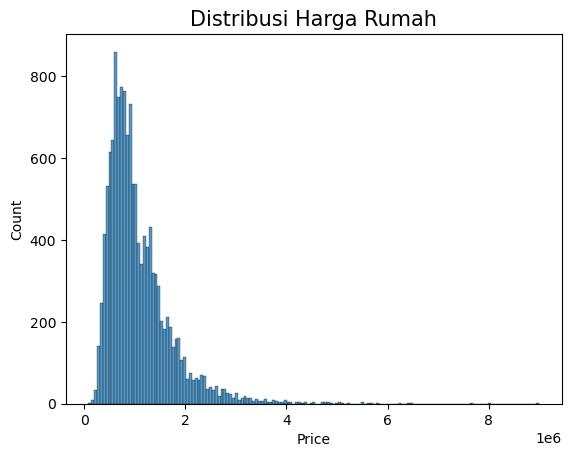

In [2]:
# Soal 1
sns.histplot(df['Price'])
plt.title('Distribusi Harga Rumah', size=15)
plt.ylabel('Count')

Text(0.5, 0, 'Distance')

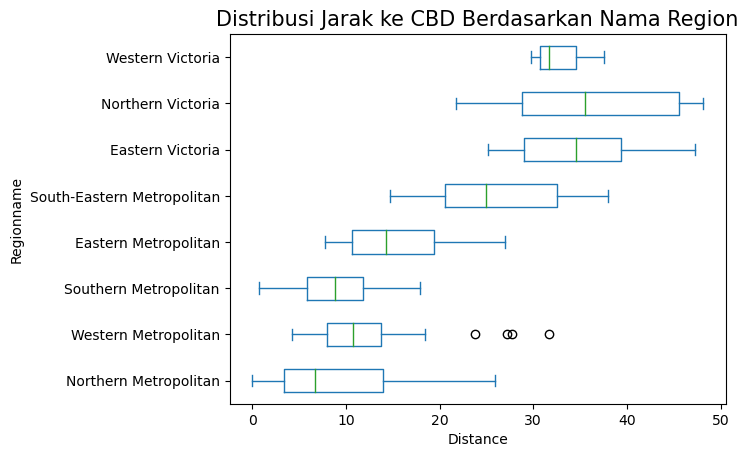

In [3]:
# Soal 2
temp = df[['Regionname', 'Distance']]
df2 = temp.drop_duplicates()
region_list = df2['Regionname'].unique().tolist()
dict_ = {}

for reg in region_list:
    temp = df2[df2['Regionname'] == reg]['Distance']
    temp = pd.DataFrame([temp]).transpose()
    to_list = temp['Distance'].tolist()
    dict_[reg] = to_list
        
df_ans = pd.DataFrame.from_dict(dict_, orient='index')

(df_ans.transpose()).plot(kind='box', vert=False)
plt.title('Distribusi Jarak ke CBD Berdasarkan Nama Region', size=15)
plt.ylabel('Regionname')
plt.xlabel('Distance')

Text(0.5, 0, 'Type')

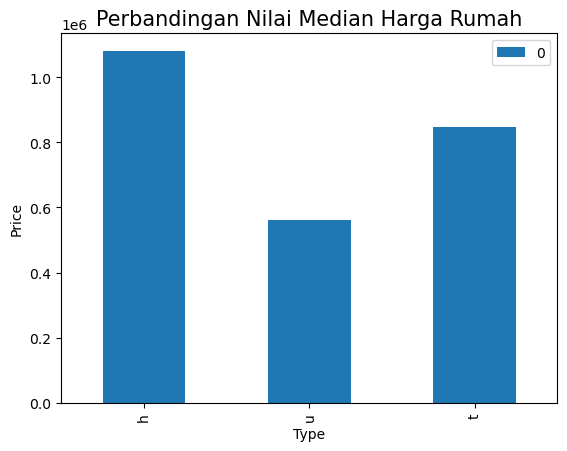

In [11]:
# Soal 3
import statistics
temp = df[['Type', 'Price']]
df3 = df[['Type', 'Price']]
type_list = temp['Type'].unique().tolist()
type_list

dict_ = {}

for typ in type_list:
    temp = df3[df3['Type'] == typ]['Price']
    temp = pd.DataFrame([temp]).transpose()
    to_list = temp['Price'].tolist()
    dict_[typ] = statistics.median(to_list)


df_ans = pd.DataFrame.from_dict(dict_, orient='index')
df_ans.plot(kind='bar')
plt.title('Perbandingan Nilai Median Harga Rumah', size=15)
plt.ylabel('Price')
plt.xlabel('Type')

Text(0.5, 1.0, 'Korelasi Harga Rumah dan Jarak Rumah ke CBD')

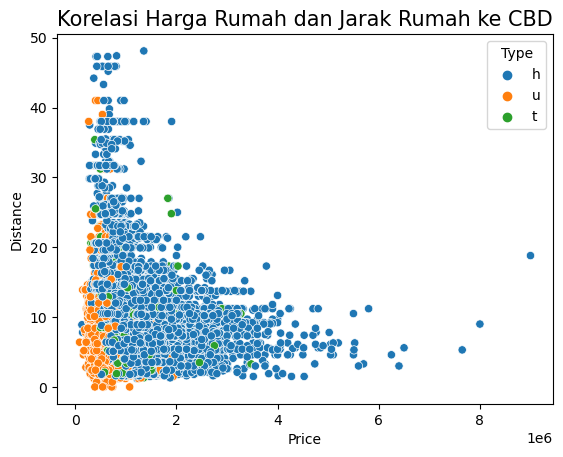

In [14]:
# Soal 4
temp = df[['Distance', 'Price', 'Type']]
sns.scatterplot(data=temp, x='Price', y='Distance', hue='Type')
plt.title('Korelasi Harga Rumah dan Jarak Rumah ke CBD', size=15)

In [69]:
# Soal 5
temp = df[['Date', 'Price', 'Type']]
temp['Date'] = pd.to_datetime(temp["Date"])

C:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/08/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/05/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/07/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

In [71]:
temp["Month"] = temp["Date"].dt.month

C:\Users\hp\AppData\Local\Temp\ipykernel_6296\4068172705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Month"] = temp["Date"].dt.month


In [72]:
temp

,Date,Price,Type,Month
0,2016-03-12,1480000.0,h,3
1,2016-04-02,1035000.0,h,4
2,2017-04-03,1465000.0,h,4
3,2017-04-03,850000.0,h,4
4,2016-04-06,1600000.0,h,4
...,...,...,...,...
13575,2017-08-26,1245000.0,h,8
13576,2017-08-26,1031000.0,h,8
13577,2017-08-26,1170000.0,h,8
13578,2017-08-26,2500000.0,h,8


Text(0.5, 1.0, 'Tren Harga Rumah per Bulan Berdasarkan Tipe Rumah')

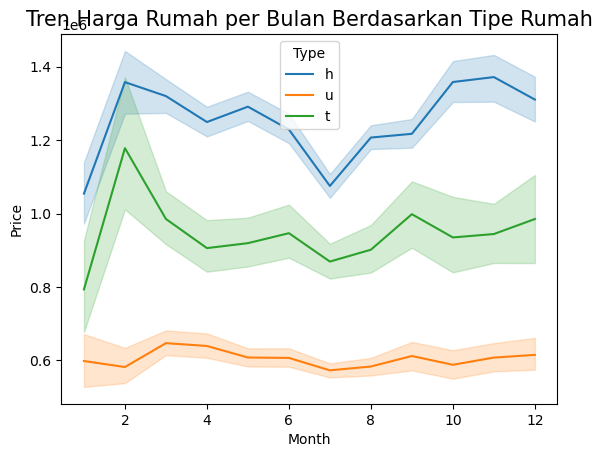

In [73]:
sns.lineplot(data=temp, x="Month", y="Price", hue="Type")
plt.title('Tren Harga Rumah per Bulan Berdasarkan Tipe Rumah', size=15)

Text(0.5, 1.0, 'Proporsi Luas Tanah Tiap Region')

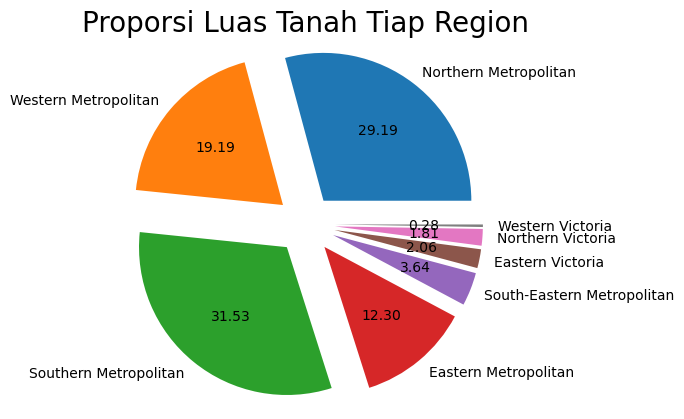

In [66]:
# Soal 6
temp = df[['Regionname', 'Landsize']]
df3 = df[['Regionname', 'Landsize']]
region_list = temp['Regionname'].unique().tolist()

dict_ = {}
count = 0

for reg in region_list:
    temp = df3[df3['Regionname'] == reg]['Landsize']
    temp = pd.DataFrame([temp]).transpose()
    to_list = temp['Landsize'].tolist()
    dict_[count] = [reg, sum(to_list)]
    count = count + 1

myexplode = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
    
df_ans = pd.DataFrame.from_dict(dict_, orient='index')
plt.pie(df_ans[1], labels=df_ans[0], autopct='%.2f', explode=myexplode)
plt.title('Proporsi Luas Tanah Tiap Region', size=20)